<img src="https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion6/Parte-2/imagenes/Banner%20Hands-on.png" width="1600" align="middle"/>

# <font color='#ECA702'>**Hands-on Sesión 6: Time of flight**</font>


El "Time of Flight" (ToF) es una técnica de medición que determina la distancia entre un sensor y un objeto al calcular el tiempo que tarda una señal emitida, como un pulso de luz o una onda de sonido, en viajar desde el sensor hasta el objeto y regresar. Esta tecnología se utiliza ampliamente en varias aplicaciones, incluyendo la medición de distancias, la creación de imágenes 3D, y en sensores para robótica y vehículos autónomos.

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td style="text-align:center;">
      <img src="https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion6/Parte-2/imagenes/app1.jpg" width="800px"/>
    </td>
    <td style="text-align:center;">
      <img src="https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion6/Parte-2/imagenes/app2.jpg" width="800px"/>
    </td>
  </tr>
</table>


Para esta sesión, trabajaremos con dos tipos de tecnología Time of Flight, cada uno con sus características y aplicaciones específicas:

- Indirect Time of Flight (iToF)
- Direct Time of Flight (dToF)

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion6/Parte-2/imagenes/difference.jpg" width="900" style="display: block; margin: auto;">
</div>


# <font color='#4C5FDA'>**Indirect Time of flight (iToF)**</font>



El método "Indirect Time of Flight" (iToF) es una técnica utilizada en la medición de distancias y en la generación de imágenes 3D. Este método se basa en la medición del tiempo que tarda la luz en viajar desde una fuente, rebotar en un objeto y volver al sensor.

En el iToF, la luz, generalmente un haz láser o LED, es modulada con una frecuencia específica antes de ser emitida. Cuando esta luz modulada incide en un objeto y regresa, la señal recibida tendrá un cambio de fase respecto a la señal original emitida. Midiendo este cambio de fase, el sistema puede calcular la distancia al objeto porque el cambio de fase es proporcional al doble de la distancia recorrida por la luz, dado que la luz viaja hacia el objeto y luego regresa.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion6/Parte-2/imagenes/itof_image.png" width="700" style="display: block; margin: auto;">
</div>


# <font color='#4C5FDA'>**Objetivo**</font>

A continuación realizaremos una simulación de un enfoque de medicion de tiempo de vuelo indirecto llamado método de cuadratura.


El método de cuadratura en el contexto de la estimación de Time of Flight (ToF) indirecto se refiere a un enfoque utilizado para medir la fase de la señal de luz reflejada en comparación con la señal de luz emitida. Este método es una parte crucial del proceso para determinar la distancia basada en la medición de fase, especialmente en sistemas que utilizan la técnica Indirect Time of Flight (iToF).

# <font color='#4C5FDA'>**Instalamos paquetes y librerias**</font>

In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image


In [3]:
# Importamos datos a usar

!gdown --id "1x4_o-lhGfki9uF6MTTv7JbKszOlfItrg"
!gdown --id "16ifriwMVlm6yJC2Wbfm_TDHT8wEeu36x"
!gdown --id "1ufDQ6aJe3bZf9L5zA2aL-yFbFEYPXem3"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1x4_o-lhGfki9uF6MTTv7JbKszOlfItrg
To: /content/sample_1.png
100% 1.13M/1.13M [00:00<00:00, 55.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16ifriwMVlm6yJC2Wbfm_TDHT8wEeu36x
To: /content/sample_3.png
100% 644k/644k [00:00<00:00, 35.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc

# **<font color='#ECA702'>Reto #1</font>**


**<font color='#ECA702'>Paso 1: Simulación de la Señal Reflejada</font>**


Primero, se establecen los parámetros básicos y las ecuaciones necesarias:

- **Frecuencia de Modulación (f):** Se define la frecuencia de la luz modulada, típicamente en MegaHertz (MHz).
- **Longitud de Onda (λ):** La longitud de onda se calcula a partir de la velocidad de la luz (c) y la frecuencia: $\lambda = \frac{c}{f}$
- **Profundidad Máxima (max_depth):** Esto se refiere al rango máximo de medición, que también depende de la frecuencia de modulación y la velocidad de la luz: $\max\_depth = \frac{\lambda}{2}$
- **Amplitud (A):** Este es un parámetro que define la intensidad de la señal de salida.


1. Cálculo de la Fase:

\begin{align}
\text{phase} &= \frac{2 \cdot d}{\lambda} \cdot 2 \pi \tag{1}
\end{align}

donde $d$ es la distancia medida desde el sensor al objeto.

2. Derivación de la Distancia:

\begin{align}
\text{d} &= \frac{c}{2} \cdot \frac{\theta}{2 \pi f} \tag{2} \\
\text{d} &= \frac{c}{2} \cdot \frac{\theta}{2 \pi} \cdot \frac{\lambda}{c} \tag{3}
\end{align}

Con esto ya podremos calcular la fase para cada pixel en la imagen a partir de la profundidad con la ecuación (1). En la simulación se define la `frecuencia` en MegaHertz y con esta se pueden encontrar los valores de `wavelength`, `max_depth`, además definimos la amplitud `A`

In [4]:

freq = 15 * 1e6 # en MHz

c = 3e8 # en m/s
wavelength = c / freq # en m
max_depth = wavelength / 2

A = 0.5


1.2566370614359172 1.8849555921538759


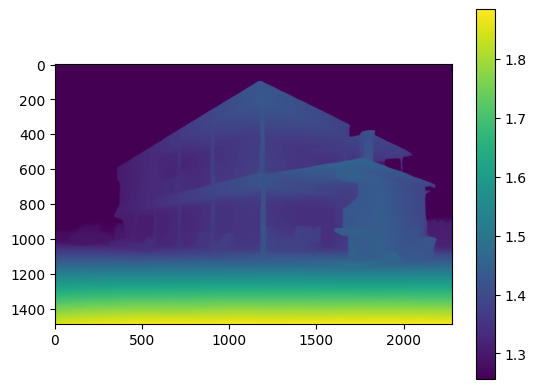

In [7]:
# Cargamos la imagen
depth_img = cv.imread("/content/sample_1.png") # Ruta al archivo .png
depth_img = np.mean(depth_img, 2)

min_depth = np.min(depth_img)
max_depth = np.max(depth_img)

depth_img = (depth_img - min_depth) / (max_depth - min_depth) + 2

(nr, nc) = depth_img.shape

fase_img = (2 * depth_img / wavelength) * 2 * np.pi

plt.imshow(fase_img)
plt.colorbar()

print(np.min(fase_img), np.max(fase_img))

**<font color='#ECA702'>Paso 2: Cálculo de Componentes en Cuadratura y Aplicación del Arcotangente</font>**


Una vez obtenida la matriz de fases, podremos calcular los cuatro términos de cuadratura. Los compnentes representan la señal sinosoidal en diferentes desfases:

- $g_{0} = 0$
- $g_{1} = \frac{\pi}{2}$
- $g_{2} = \pi$
- $g_{3} = \frac{2 \pi}{3}$

Esto se convierte en la funcion sinosoidal desplazada, evaluada en el desfase

$$g_{0} = \cos(θ),g_2 = - sin(θ),g_3 = -\cos(θ),g_4 = sin(θ)$$


Posteriormente utiizamos la función `arctan2` para calcular la fase de la señal combinada:

$$
\begin{align*}
\text{phase\_estimated} = \text{arctan2}\left(\frac{g_{3} - g_{1}}{g_{0} - g_{2}}\right)
\end{align*}
$$

Text(0.5, 1.0, 'g3')

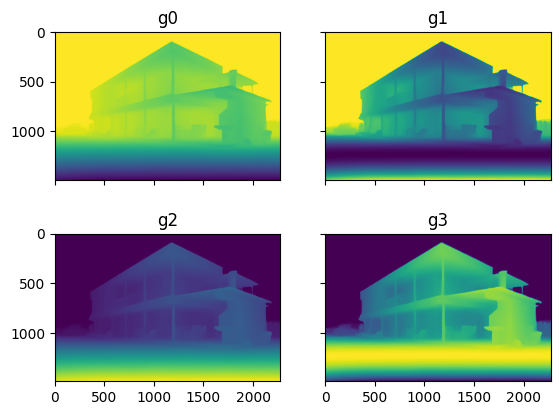

In [8]:
g0 = A / 2 * np.cos(fase_img)
g1 = - A / 2 * np.sin(fase_img)
g2 = - A / 2 * np.cos(fase_img)
g3 = A / 2 * np.sin(fase_img)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].imshow(g0)
axs[0, 0].set_title('g0')
axs[0, 1].imshow(g1)
axs[0, 1].set_title('g1')
axs[1, 0].imshow(g2)
axs[1, 0].set_title('g2')
axs[1, 1].imshow(g3)
axs[1, 1].set_title('g3')


In [9]:
fases = np.arctan2(g3 - g1, g0 - g2)
print(np.min(fases), np.max(fases))

1.2566370614359172 1.8849555921538759


**<font color='#ECA702'>Paso 3: Estimar la profundidad</font>**

Con la fase estimada calculada, convertimos esta fase nuevamente a profundidad usando la ecuación (2).

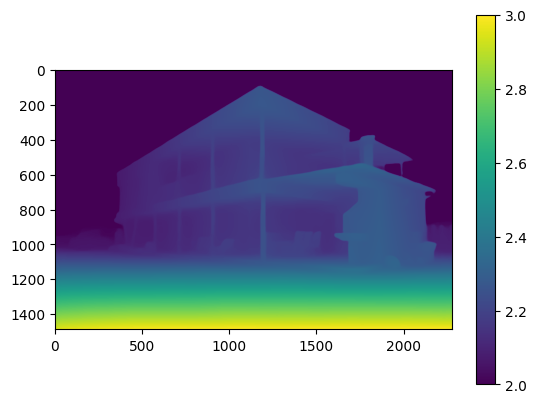

In [10]:
depth = (c/2) * ( fases / (2 * np.pi * 3e8/(10*2) ) )

plt.imshow(depth)
plt.colorbar()

A continuación estimamos el error entre la imagen real y la imagen estimada

2.0 3.0
2.0 3.0


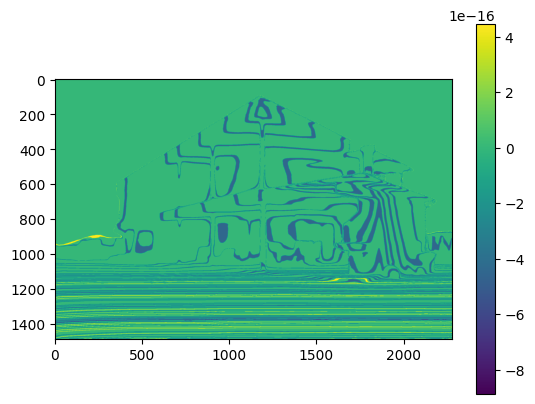

In [11]:
plt.imshow(depth_img - depth)
plt.colorbar()

print(np.min(depth), np.max(depth))
print(np.min(depth_img), np.max(depth_img))

# **Direct Time of Flight**

El proceso "direct Time of Flight" (dToF) es una técnica utilizada para medir la distancia entre un sensor y un objeto mediante el uso de la luz. Funciona emitiendo un pulso de luz, usualmente un rayo láser, hacia un objeto y midiendo el tiempo que tarda ese pulso de luz en viajar desde el sensor hasta el objeto y volver. La distancia se calcula luego usando la velocidad de la luz y el tiempo medido.

Este método es especialmente útil en aplicaciones como el mapeo en 3D, la robótica, y en dispositivos móviles para funciones relacionadas con la realidad aumentada y la fotografía. Además, debido a su precisión y capacidad para medir directamente la distancia sin necesidad de interpretación de imágenes, es una técnica valiosa en muchos campos tecnológicos y de investigación.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion6/Parte-2/imagenes/tof_image.webp" width="700" style="display: block; margin: auto;">
</div>


# **<font color='#ECA702'>Reto #2</font>**


A continuacion simularemos el proceso de medición de tiempo de vuelo directo (dToF) y calcularemos la distancia usando una aproximación probabilística y generación de datos sintéticos

**<font color='#ECA702'>Paso 1: Configuración de Parámetros</font>**


In [12]:
# Parámetros
c = 3e8  # Velocidad de la luz
max_depth = 100
min_depth = 1
time_bin = 1e-8
tiempo_observacion = 1e-6  # Tiempo de observación para capturar el pulso reflejado
path_to_depth_image = "/content/sample_1.png"  # Ruta al archivo .png

# Cargar la imagen de profundidad
profundidad_real = cv.imread(path_to_depth_image, cv.IMREAD_GRAYSCALE)
profundidad_real = (profundidad_real / profundidad_real.max()) * max_depth + min_depth

**<font color='#ECA702'>Paso 2: Simulación de los tiempos de llegada:</font>**


In [13]:
# Simular tiempos de llegada basados en la profundidad
tiempos_llegada = 2 * profundidad_real / c  # Calcula tiempo ida y vuelta


**<font color='#ECA702'>Paso 3: Realizamos una convolucion con un filtro gaussiano</font>**


In [14]:
# Cálculo de profundidad estimada
bins = np.arange(0, tiempo_observacion, time_bin)  # Bins de histograma
num_bins = len(bins) - 1

profundidad_estimada = np.zeros_like(profundidad_real)
print(len(bins))

100


In [15]:
def gaussian_filter1d(size,sigma):
    filter_range = np.linspace(-int(size/2),int(size/2),size)
    gaussian_filter = [1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-x**2/(2*sigma**2)) for x in filter_range]
    return gaussian_filter

hist = np.zeros((profundidad_real.shape[0], profundidad_real.shape[1], num_bins))
hist2 = np.zeros((profundidad_real.shape[0], profundidad_real.shape[1], num_bins + 1))
kernel = gaussian_filter1d(len(bins), 10)


In [16]:
# Histogramas para cada pixel de la imagen
for i in range(profundidad_real.shape[0]):
    for j in range(profundidad_real.shape[1]):
        hist_vals, _ = np.histogram(tiempos_llegada[i, j], bins=bins)
        hist[i, j, :] = hist_vals.flatten()
        aux = np.convolve(hist[i, j, :], kernel, 'same')
        hist2[i, j, :] = aux / aux.max()

In [17]:
hist2 = hist2 + np.random.normal(0, 1, hist2.shape)  # Agregando ruido gaussiano


**<font color='#ECA702'>Paso 4: Estimar la profundidad para cada píxel</font>**

- Encontrar el 'bin' del histograma con la mayor cantidad de conteos.
- Determinar el tiempo de centroide (tiempo promedio) basándose en el 'bin' más poblado.
- Calcular la profundidad estimada a partir de este tiempo y la velocidad de la luz.

In [18]:
profundidad_estimada = np.zeros_like(profundidad_real)

for i in range(profundidad_real.shape[0]):
    for j in range(profundidad_real.shape[1]):
        bin_max = np.argmax(hist2[i, j, :])
        tiempo_centroide = (bins[bin_max] + bins[bin_max]) / 2
        profundidad_estimada[i, j] = c * tiempo_centroide / 2


**<font color='#ECA702'>Paso 5: Graficar la profundidad estimada</font>**


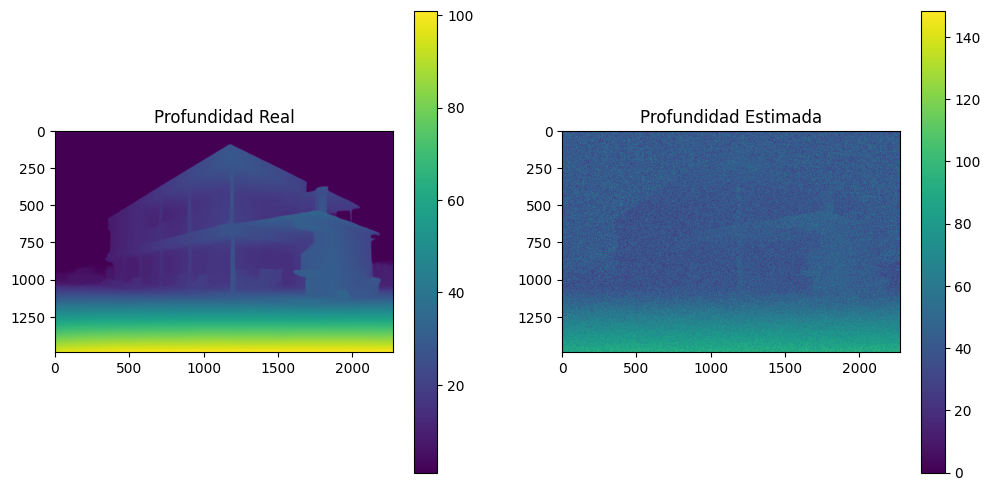

In [19]:

# Visualización de resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(profundidad_real, cmap='viridis')
plt.colorbar()
plt.title('Profundidad Real')

plt.subplot(1, 2, 2)
plt.imshow(profundidad_estimada, cmap='viridis')
plt.colorbar()
plt.title('Profundidad Estimada')
plt.show()


In [20]:
error = np.zeros_like(profundidad_real)  # Para guardar el error
abs_error = np.zeros_like(profundidad_real) # Para guardar el error absoluto

# Calcular el error
error = profundidad_real - profundidad_estimada
# Calcular el error absoluto
abs_error = abs(error)

print(f"Average error: {np.mean(abs_error)}")
print(f"Maximum absolute error: {np.max(abs_error)}")
print(f"Minimum absolute error: {np.min(abs_error)}")

Average error: 29.656631832356275
Maximum absolute error: 147.5
Minimum absolute error: 0.0


' print(np.min(depth), np.max(depth))\nprint(np.min(depth_img), np.max(depth_img)) '

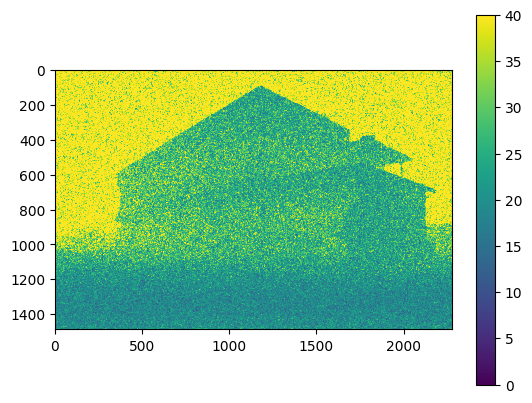

In [21]:
plt.imshow(abs_error, vmin=0, vmax=40)
plt.colorbar()

""" print(np.min(depth), np.max(depth))
print(np.min(depth_img), np.max(depth_img)) """